In [1]:
from pandas import json_normalize
import pandas as pd
import json

In [2]:
def generate_majority_predictions(df): 
    predict = {}
    predict = []
    for req_id in df['req_id'].unique(): 

        req_df = df[df['req_id'] == req_id]
        maj_ele = req_df['predict'].value_counts().index[0]
        uncertainty = max(req_df['predict'].value_counts()) / len(req_df)
        #print(req_id)
        
        mean_score = req_df[(req_df['req_id']==req_id)& (req_df['predict']!= "undefined") & (req_df['score']!="undefined")].score.mean()
        
        #predict[req_id] = {"majority_predict" : maj_ele, "uncertainty" : uncertainty}
        predict.append({"req_id": req_id, "majority_predict" : maj_ele, "uncertainty" : uncertainty, "mean_score": mean_score})
    predict = pd.DataFrame(predict)
    return predict

In [3]:
import pandas as pd 

def get_results_gt(df_predict, df_gt): 

    predict = generate_majority_predictions(df_predict)

    ground_truth = generate_majority_predictions(df_gt)

    # Merge the DataFrames on the 'req_id' column
    merged_df = pd.merge(predict, ground_truth, on='req_id', suffixes=('_gpt4', '_openchat'))

    # Compare the values in the 'majority_predict' column
    merged_df['is_same'] = merged_df['majority_predict_gpt4'] == merged_df['majority_predict_openchat']
    merged_df.head(5)

    df1 = df_predict
    df2 = merged_df
    key = "req_id"
    # Merging df1 with a column (value2) from df2 using 'key' as the common column
    df = df1.merge(df2[[key, 'majority_predict_openchat',"uncertainty_openchat",'is_same']], on=key, how='left')
    df = df.rename(columns={'is_same':'correct'})

    ## only include examples that finished with valid response
    df = df[(df['score'] != "undefined") & (df['predict']!= "undefined")]

    #df = df[df['majority_predict_openchat'] != "undefined"]

    df.reset_index(drop=True, inplace=True)

    return df 

In [59]:
#df_openchat = pd.read_json("dataframe_open_chat_cot_moon_18012024_attentions.json")

df_openchat = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_06022024_attentions.json")

df_gpt4 = pd.read_json("results_gpt4_cot_moon_complete.json")

df = get_results_gt(df_openchat, df_gpt4)

df.to_json("dataframe_open_chat_cot_moon_06022024_attentions_gt.json", orient="records", indent=4)

In [4]:
#df_openchat = pd.read_json("dataframe_open_chat_cot_moon_18012024_attentions.json")

df_openchat = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_09042024_attentions.json")

df_gpt4 = pd.read_json("results_gpt4_cot_moon_complete.json")

df = get_results_gt(df_openchat, df_gpt4)

df.to_json("dataframe_open_chat_cot_moon_09042024_attentions_gt.json", orient="records", indent=4)

In [5]:
df_openchat = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_18012024_attentions_new.json")

#df_openchat = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_06022024_attentions.json")

df_gpt4 = pd.read_json("results_gpt4_cot_moon_complete.json")

df = get_results_gt(df_openchat, df_gpt4)

df.to_json("dataframe_open_chat_cot_moon_18012024_attentions_gt_new.json", orient="records", indent=4)

### Filter df for false positives and negatives

In [5]:
df = pd.read_json("dataframe_open_chat_cot_moon_18012024_attentions_gt.json")

df = df[df['majority_predict_openchat'] != "undefined"]

df = df[df['uncertainty_openchat'] > 0.5]

## filter for false positives and true negatives
df = df[((df.final_answer == True) & (df.correct == False)) | ((df.final_answer == False) & (df.correct == True))]

#df = df[df.final_answer == True]
df.reset_index(drop=True, inplace=True)

### Filter df for false and positives

In [12]:
df = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_06022024_attentions_gt.json")

#df = df[df['uncertainty_openchat'] > 0.5]
## filter for false positives and true negatives
#df# = df[((df.final_answer == True) & (df.correct == False)) | ((df.final_answer == False) & (df.correct == True))]
#df = df[df.final_answer == True]

df.reset_index(drop=True, inplace=True)
correct = [0 if value == "yes" else 1 for value in df.predict.values]
df.correct = correct

# ## variant examples
# variance = []
# for req_id in df['req_id'].unique(): 

#     if df[df['req_id'] == req_id]['predict'].nunique() > 1: 
#         print(req_id)
#         variance.append(req_id)

In [81]:
train_idxs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
# grouped = df.groupby('req_id')
# #grouped.head(5)
# # Filter groups by unique values in Column2
# filtered_df = df.groupby('req_id').filter(lambda x: x['predict'].nunique() > 1)
 
# print(filtered_df)

Empty DataFrame
Columns: [prompt, output, final_answer, predict, score, sequence_uncertainty, hidden_states.-1_last_token, hidden_states.-8_last_token, hidden_states.-16_last_token, hidden_states.-24_last_token, req_id, requirement, complete_inputs, attentions, majority_predict_openchat, uncertainty_openchat, correct]
Index: []


### get false positives and true negatives pairs

In [54]:
## get indexes same req but different predicts 

df_openchat = pd.read_json("dataframe_open_chat_cot_moon_18012024_attentions.json")
predict_openchat = generate_majority_predictions(df_openchat)

df_gpt4 = pd.read_json("results_gpt4_cot_moon_complete.json")
predict_gpt4 = generate_majority_predictions(df_gpt4)

# Merge the DataFrames on the 'req_id' column
merged_df = pd.merge(predict_gpt4, predict_openchat, on='req_id', suffixes=('_gpt4', '_openchat'))

# Compare the values in the 'majority_predict' column
merged_df['is_same'] = merged_df['majority_predict_gpt4'] == merged_df['majority_predict_openchat']
merged_df.head(5)

df1 = df_openchat
df2 = merged_df
key = "req_id"
# Merging df1 with a column (value2) from df2 using 'key' as the common column
df = df1.merge(df2[[key, 'majority_predict_openchat',"uncertainty_openchat",'is_same']], on=key, how='left')
df = df.rename(columns={'is_same':'correct'})

## only include examples that finished with valid response
df = df[(df['score'] != "undefined") & (df['predict']!= "undefined")]

# corrects = []
# ## preprocessing to give rowise predict information
# for row in df.iterrows():
#     if row[1]['correct'] == True:
#         corrects.append(row[1].predict == row[1]['majority_predict_openchat'])
#     else:
#         corrects.append(row[1].predict!= row[1]['majority_predict_openchat'])

# df.correct = corrects

# ## filter for false positives
# filt = df[((df.final_answer == True) & (df.correct == False))].req_id.unique()

# ## only include examples what have false positives 
# df = df[df.req_id.isin(filt)]

# #df = df[df.final_answer == True]
# df.reset_index(drop=True, inplace=True)

# ## variant examples
# variance = []
# for req_id in df['req_id'].unique(): 

#     if df[df['req_id'] == req_id]['predict'].nunique() > 1: 
#         print(req_id)
#         variance.append(req_id)

In [55]:
df.correct.value_counts()

correct
True     53
False    40
Name: count, dtype: int64

In [30]:
df['req_id'].unique()

array(['RQ-8-3', 'RQ-8-5', 'RQ-2-2', 'RQ-2-5', 'RQ-8-6', 'RQ-8-7',
       'RQ-11', 'RQ-12', 'RQ-2-6', 'RQ-2-7', 'RQ-2-12', 'RQ-2-8'],
      dtype=object)

In [41]:
filt

array(['RQ-8-3', 'RQ-8-5', 'RQ-2-2', 'RQ-2-5', 'RQ-8-6', 'RQ-8-7',
       'RQ-11', 'RQ-12', 'RQ-2-6', 'RQ-2-7', 'RQ-2-12', 'RQ-2-8'],
      dtype=object)

In [ ]:
df

In [8]:
import pandas as pd 

#df = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_18012024_attentions_gt.json")

df = pd.read_json("requirements_data/dataframe_open_chat_cot_moon_18012024_attentions_gt_new.json")
correct = [0 if value == "yes" else 1 for value in df.predict.values]

df.correct = correct

df.correct.value_counts()

# corrects = []
# ## preprocessing to give rowise predict information
# for row in df.iterrows():
#     if row[1]['correct'] == True:
#         corrects.append(row[1].predict == row[1]['majority_predict_openchat'])
#     else:
#         corrects.append(row[1].predict!= row[1]['majority_predict_openchat'])

# df.correct = corrects

# ## filter for false positives
# filt = df[((df.final_answer == True) & (df.correct == False))].req_id.unique()

# ## only include examples what have false positives 
# df = df[df.req_id.isin(filt)]

# #df = df[df.final_answer == True]
# df.reset_index(drop=True, inplace=True)

# ## variant examples
# variance = []
# for req_id in df['req_id'].unique(): 

#     if df[df['req_id'] == req_id]['predict'].nunique() > 1: 
#         print(req_id)
#         variance.append(req_id)

correct
0    58
1    35
Name: count, dtype: int64

In [46]:
df.correct.value_counts()

correct
True     79
False    14
Name: count, dtype: int64

In [43]:
df['req_id'].unique()

array(['RQ-2-5', 'RQ-2-6', 'RQ-2-8'], dtype=object)

In [35]:
#df

In [106]:
req_id = "RQ-2-12"
df[df['req_id'] == req_id]['predict']

93    yes
94     no
95    yes
96    yes
97     no
Name: predict, dtype: object

In [108]:
df.req_id.unique()

array(['RQ-8-3', 'RQ-8-5', 'RQ-2-2', 'RQ-2-5', 'RQ-8-6', 'RQ-8-7',
       'RQ-11', 'RQ-12', 'RQ-2-6', 'RQ-2-7', 'RQ-2-12', 'RQ-2-8'],
      dtype=object)

In [125]:
variance

['RQ-8-5', 'RQ-2-5', 'RQ-11', 'RQ-12', 'RQ-2-6', 'RQ-2-7', 'RQ-2-12', 'RQ-2-8']

In [129]:
index_dic

{'RQ-8-3': [0, 1, 2, 3],
 'RQ-8-5': [4, 5, 6, 7, 8],
 'RQ-2-2': [9, 10, 11, 12, 13],
 'RQ-2-5': [14, 15, 16, 17, 18],
 'RQ-8-6': [19, 20, 21, 22],
 'RQ-8-7': [23, 24, 25, 26, 27],
 'RQ-11': [28, 29, 30, 31],
 'RQ-12': [32, 33, 34, 35],
 'RQ-2-6': [36, 37, 38, 39],
 'RQ-2-7': [40, 41, 42, 43],
 'RQ-2-12': [44, 45, 46, 47, 48],
 'RQ-2-8': [49, 50, 51, 52, 53]}

In [208]:
#list(index_dic.keys())

### Train test_split

#### old

In [23]:
import numpy as np

from dataclasses import dataclass

@dataclass
class Args:
    #model_name: str
    #dataset_name: str
    #activations_dataset: str
    val_ratio: float

args = Args(val_ratio=0.5)

#req_ids = []
index_dic = {}
separated_activations = []
separated_labels = []
reqs_order = []
for req_id in df['req_id'].unique():

    req_df = df[df['req_id'] == req_id].index

    #req_ids.append(req_df)
    index_dic[req_id] = list(req_df)
    
    temp_activations = df[df['req_id'] == req_id].attentions
    activations = np.array([list(sample.values()) for sample in temp_activations.values])#.shape
    batch_length = len(temp_activations)
    dim = 128
    activations = np.reshape(activations, (batch_length, 32, 32, dim))

    temp_labels =[1 if label==True else 0 for label in df[df['req_id'] == req_id]['correct'].values]
    separated_labels.append(temp_labels)
    separated_activations.append(activations)
    reqs_order.append(req_id)
    
import numpy as np

#train_idxs = [reqs_order.index(i) for i in variance]
train_idxs = np.arange(len(reqs_order))
print(train_idxs)

indexes = np.arange(len(reqs_order))
# Create a random generator with a specific seed
seed = 42  # You can choose your own seed value
rng = np.random.default_rng(seed)
size = int(len(reqs_order)*(1-args.val_ratio))
print(size)
train_set_idxs = rng.choice(train_idxs, size=size, replace=False)
val_set_idxs = np.array([x for x in indexes if x not in train_set_idxs])

# pick a val set using numpy
#train_set_idxs = np.random.choice(train_idxs, size=int(len(train_idxs)*(1-args.val_ratio)), replace=False)
#val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])
len(val_set_idxs)

val_index_list = np.concatenate([list(index_dic.values())[i] for i in val_set_idxs], axis = 0)
val_set = df.loc[val_index_list]



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
10


#### new

In [9]:
import numpy as np 
index_dic = {}
separated_activations = []
separated_labels = []
reqs_order = []
for req_id in df['req_id'].unique():

    req_df = df[df['req_id'] == req_id].index

    #req_ids.append(req_df)
    index_dic[req_id] = list(req_df)
    
    temp_activations = df[df['req_id'] == req_id].attentions
    activations = np.array([list(sample.values()) for sample in temp_activations.values])#.shape
    batch_length = len(temp_activations)
    dim = 128
    activations = np.reshape(activations, (batch_length, 32, 32, dim))

    temp_labels =[1 if label==True else 0 for label in df[df['req_id'] == req_id]['correct'].values]
    separated_labels.append(temp_labels)
    separated_activations.append(activations)
    reqs_order.append(req_id)

number_of_examples = np.arange(len(reqs_order))

# get two folds using numpy
num_fold = 1
fold_idxs = np.array_split(number_of_examples, num_fold)

i=0

if num_fold == 1: 
            train_idxs = np.arange(len(reqs_order))
else:

    train_idxs = np.concatenate([fold_idxs[j] for j in range(num_fold) if j != i])


val_ratio = 0.5 
seed = 42  # You can choose your own seed value
rng = np.random.default_rng(seed)
size = int(len(train_idxs)*(1-val_ratio))
#print(size)
train_set_idxs = rng.choice(train_idxs, size=size, replace=False)
val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])

if len(fold_idxs) == 1:
    test_idxs = val_set_idxs
else:
    test_idxs = fold_idxs[i]

print(fold_idxs)
print(train_idxs)
print(train_set_idxs)
print(val_set_idxs)
print(test_idxs)

train_index_list = np.concatenate([list(index_dic.values())[i] for i in train_set_idxs], axis = 0)
train_set = df.loc[train_index_list]


[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1  9  0  8  6 14 12 19  3 13]
[ 2  4  5  7 10 11 15 16 17 18]
[ 2  4  5  7 10 11 15 16 17 18]


In [15]:
df = pd.read_json("./requirements_data/dataframe_open_chat_cot_moon_06022024_attentions_gt.json")
correct = [0 if value == "yes" else 1 for value in df.predict.values]
df.correct = correct

In [16]:
test_set = df[~df.req_id.isin(train_set.req_id.unique())]

In [17]:
test_set

,prompt,output,final_answer,predict,score,sequence_uncertainty,hidden_states.-1_last_token,hidden_states.-8_last_token,hidden_states.-16_last_token,hidden_states.-24_last_token,req_id,requirement,complete_inputs,attentions,majority_predict_openchat,uncertainty_openchat,correct
11,"GPT4 Correct User:System: |Structure, Shieldin...",\n\n1. The Logical System directly contains th...,True,yes,0.84,0.16,"[4.6953125, 4.53125, 0.6303710938, 2.912109375...","[0.0170898438, 0.0705566406, 0.094238281200000...","[0.0143737793, 0.0370483398, 0.0023880005, 0.0...","[-0.0162353516, 0.0102996826, -0.0104675293, -...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0001180172, -0.00097846...",no,1.000000,0
12,"GPT4 Correct User:System: |Structure, Shieldin...",\n\nThe requirement states that the settlement...,False,no,0.79,0.19,"[0.5971679688, 3.244140625, 1.2392578125, 0.00...","[-0.0775146484, 0.08056640620000001, 0.0192260...","[-0.11169433590000001, 0.031097412100000003, -...","[-0.0031986237, -0.0024681091, 0.0102233887, -...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0013647079, -0.00147819...",no,1.000000,1
13,"GPT4 Correct User:System: |Structure, Shieldin...",\n\n1. The settlement is described as a Logica...,True,yes,0.96,0.19,"[4.19921875, 2.958984375, 1.822265625, 2.01953...","[-0.0088500977, 0.0687255859, 0.126953125, 0.1...","[0.0054321289, 0.0107727051, 0.0121994019, 0.0...","[-0.0139846802, 0.0044174194, -0.0121612549, -...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0007691383, -0.00194454...",no,1.000000,0
14,"GPT4 Correct User:System: |Structure, Shieldin...","\n\n1. The System description mentions an ""Air...",True,yes,0.93,0.19,"[4.94921875, 2.724609375, 1.4208984375, 1.8945...","[-0.0153808594, 0.0600280762, 0.0836181641, 0....","[-0.0078125, -0.0012817383, 0.0203857422, 0.07...","[-0.0220336914, 0.0043983459, -0.0174255371, -...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0002641678, -0.00202560...",no,1.000000,0
15,"GPT4 Correct User:System: |Structure, Shieldin...","\n\n1. The system description mentions the ""St...",True,yes,0.90,0.21,"[3.966796875, 3.07421875, 2.54296875, 2.138671...","[0.0056152344, 0.0668334961, 0.1341552734, 0.2...","[0.00042724610000000003, 0.009307861300000001,...","[-0.0207061768, 0.010231018100000001, -0.01406...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0010786057, -0.00123691...",no,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,GPT4 Correct User:System: |Power| |is_containe...,"\n\n1. The system contains ""Power"" as a compon...",True,yes,0.84,0.17,"[5.80859375, 7.08203125, 3.345703125, 2.226562...","[0.043060302700000004, 0.0911865234, 0.1235351...","[-0.018371582, -0.014526367200000001, 0.044921...","[-0.0155258179, 0.0016555786, -0.0198364258, -...",RQ-3,The settlement shall generate and store suffic...,GPT4 Correct User:System: |Power| |is_containe...,"{'layer_0_head_0': [-0.0008153915, -0.00226974...",no,0.666667,0
227,GPT4 Correct User:System: |Power| |is_containe...,\n\n1. The system has a Power component that d...,True,yes,0.87,0.14,"[1.7353515625, 8.546875, 2.701171875, 1.263671...","[-0.013244628900000001, 0.1046142578, 0.159667...","[-0.0228271484, -0.005340576200000001, 0.06732...","[-0.0103759766, 0.0142364502, -0.0192413330000...",RQ-3,None,GPT4 Correct User:System: |Power| |is_containe...,"{'layer_0_head_0': [-0.001698494, -0.002260208...",no,0.666667,0
228,GPT4 Correct User:System: |Power| |is_containe...,"\n\n1. The System has a ""Power"" component that...",True,yes,0.87,0.15,"[4.68359375, 6.816

In [7]:
len(train_set_idxs)

10

In [20]:
#separated_labels[val_set_idxs[5]]

In [19]:
#separated_labels[train_set_idxs[6]]

In [8]:
val_set.req_id.unique()
val_set[val_set.req_id=="RQ-2-7"]

NameError: name 'val_set' is not defined

In [24]:
import numpy as np
from collections import Counter

def find_majority_counter(arr):
    counter = Counter(arr)
    most_common = counter.most_common(1)[0]  # Returns the most common element and its count
    if most_common[1] > len(arr) / 2:
        return most_common[0]
    else:
        print("No majority element")
        return 1

# Example
sum = 0
total = 0
for label_lst in train_set_idxs:
    #print(find_majority_counter(separated_labels[label_lst]))
    maj = find_majority_counter(separated_labels[label_lst])
    sum += len([ele for ele in separated_labels[label_lst] if ele == maj])
    total += len(separated_labels[label_lst])
print(sum)
print(total) 



No majority element
No majority element
39
47


In [11]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm
def train_probes(seed, train_set_idxs, val_set_idxs, separated_head_wise_activations, separated_labels, num_layers, num_heads):
    
    all_head_accs = []
    probes = []
    train_accs = []
    all_X_train = np.concatenate([separated_head_wise_activations[i] for i in train_set_idxs], axis = 0)
    print(all_X_train.shape)
    all_X_val = np.concatenate([separated_head_wise_activations[i] for i in val_set_idxs], axis = 0)
    y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
    print(y_train.shape)
    y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

    for layer in tqdm(range(num_layers)): 
        for head in range(num_heads): 
            X_train = all_X_train[:,layer,head,:]
            X_val = all_X_val[:,layer,head,:]
    
            clf = LogisticRegression(random_state=seed, max_iter=100).fit(X_train, y_train)

            #if clf.converged_:
             #   print("The model converged.")
            #else:
             #   print("The model did not converge. You might need to increase max_iter or change the solver.")
            y_pred = clf.predict(X_train)
            train_accs.append(accuracy_score(y_train, y_pred))
            y_val_pred = clf.predict(X_val)
            all_head_accs.append(accuracy_score(y_val, y_val_pred))

            probes.append(clf)

    all_head_accs_np = np.array(all_head_accs)
    train_accs_np = np.array(train_accs)
    return probes, all_head_accs_np, train_accs_np

In [12]:
num_layers =32
num_heads = 32
seed = 182224
rng = np.random.default_rng(seed)
val_idxs = val_set_idxs
probes, all_head_accs_np, train_accs = train_probes(seed, train_set_idxs, val_idxs, separated_activations, separated_labels, num_layers=num_layers, num_heads=num_heads)

(47, 32, 32, 128)
(47,)


  0%|          | 0/32 [00:00<?, ?it/s]

In [9]:
import sklearn
print(sklearn.__version__)

1.3.2


In [44]:
top_heads = []

def flattened_idx_to_layer_head(flattened_idx, num_heads):
    return flattened_idx // num_heads, flattened_idx % num_heads
num_to_intervene = 8

top_accs = np.argsort(all_head_accs_np.reshape(num_heads*num_layers))[::-1][:num_to_intervene]
#print(top_accs[0:5])
top_heads = [flattened_idx_to_layer_head(idx, num_heads) for idx in top_accs]
top_heads


[(31, 14), (31, 7), (30, 0), (11, 17), (31, 20), (31, 28), (31, 5), (31, 22)]

In [36]:
np.sort(all_head_accs_np)[::-1][0:32]

In [42]:
np.sort(all_head_accs_np)[::-1][0:32]

array([0.9826087 , 0.97391304, 0.97391304, 0.96521739, 0.96521739,
       0.95652174, 0.95652174, 0.93913043, 0.93913043, 0.93043478,
       0.93043478, 0.92173913, 0.91304348, 0.91304348, 0.89565217,
       0.89565217, 0.88695652, 0.88695652, 0.87826087, 0.87826087,
       0.86956522, 0.86956522, 0.86956522, 0.85217391, 0.85217391,
       0.84347826, 0.84347826, 0.84347826, 0.82608696, 0.82608696,
       0.8       , 0.8       ])

In [31]:
np.argsort(all_head_accs_np.reshape(num_heads*num_layers))[::-1]

array([1006,  416,  984, ...,  734,  691,  270])

In [21]:
all_head_accs_np[1006]

1.0

In [24]:
all_head_accs_np[449]

1.0

In [19]:
top_accs

array([1006,  416,  984,  449])

In [11]:
test = separated_activations[val_set_idxs[2]][:,-1,-1,:]
probes[-1].predict(test)

array([1, 1, 1, 1, 1, 1])

In [46]:
test = separated_activations[train_set_idxs[2]][:,-1,-1,:]
probes[-1].predict(test)

array([0, 1, 1, 0, 1])

In [47]:
separated_labels[train_set_idxs[2]]

[0, 1, 0, 0, 1]

In [41]:
separated_labels[val_set_idxs[2]]

[1, 0, 0, 1, 1]

In [29]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming 'data' is your 32x32 dataset
# # Replace this with your actual data matrix
# data = train_accs.reshape(32,32) # np.random.rand(32, 32)  # Example data

# plt.figure(figsize=(8, 8))
# plt.imshow(data, cmap='viridis', interpolation='nearest')
# plt.colorbar(label='Density')

# plt.title('Density Square Plot')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')

# plt.show()

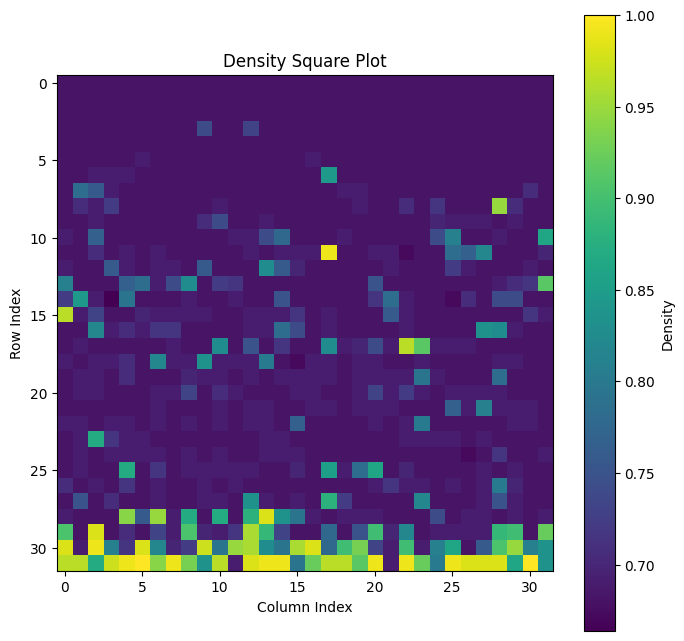

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your 32x32 dataset
# Replace this with your actual data matrix
data = train_accs.reshape(32,32) # np.random.rand(32, 32)  # Example data

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Density')

plt.title('Density Square Plot')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

plt.show()

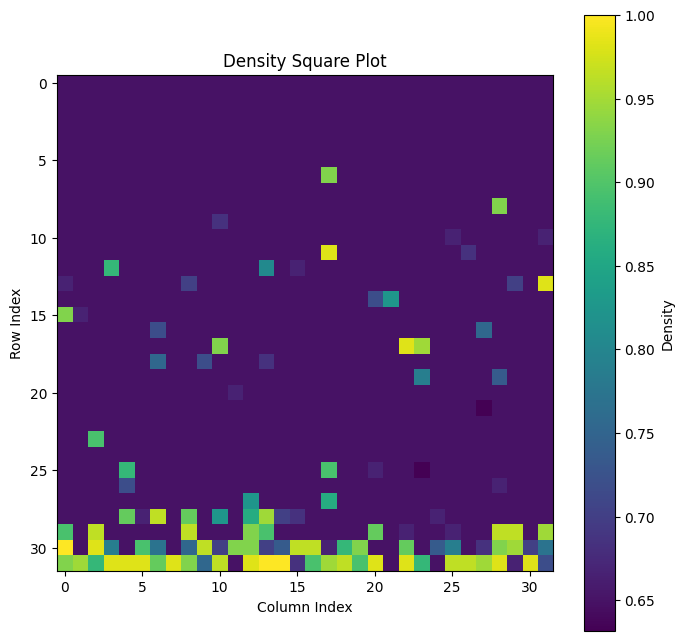

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your 32x32 dataset
# Replace this with your actual data matrix
data = train_accs.reshape(32,32) # np.random.rand(32, 32)  # Example data

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Density')

plt.title('Density Square Plot')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

plt.show()

In [61]:
len([acc for acc in train_accs if acc>0.90])

49

In [ ]:
# # get two folds using numpy
# import numpy as np
# num_fold = 2
# index_dic = {"req-1": "" ,"req-2": "", "req-3": "", "req-4": "", "req-5": "", "req-6": "", "req-7": ""}
# fold_idxs = np.array_split(np.arange(len(list(index_dic.keys()))), num_fold)
# print(fold_idxs)
# for i in range(num_fold):
#     print(i)
#     print(fold_idxs[i])
#     train_idxs = np.concatenate([fold_idxs[j] for j in range(num_fold) if j != i])

In [63]:
len([acc for acc in all_head_accs_np if acc>0.95])

77

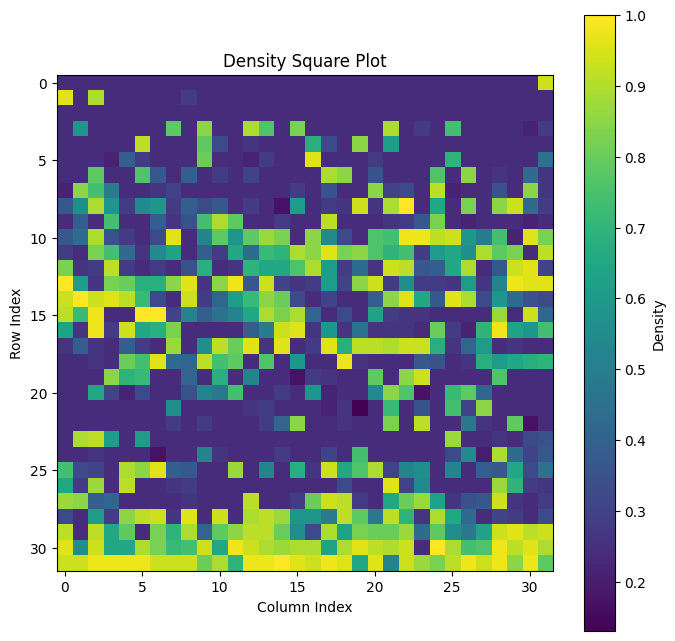

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your 32x32 dataset
# Replace this with your actual data matrix
data = all_head_accs_np.reshape(32,32) # np.random.rand(32, 32)  # Example data

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Density')

plt.title('Density Square Plot')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

plt.show()

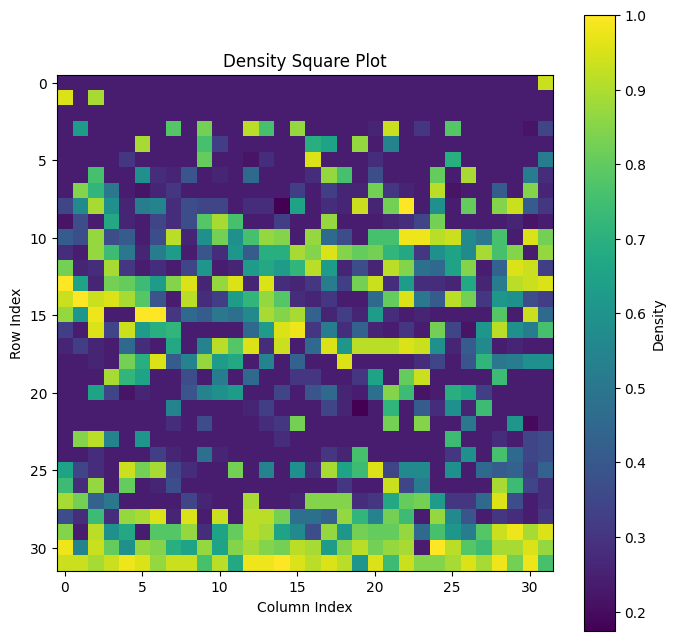

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your 32x32 dataset
# Replace this with your actual data matrix
data = all_head_accs_np.reshape(32,32) # np.random.rand(32, 32)  # Example data

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Density')

plt.title('Density Square Plot')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

plt.show()

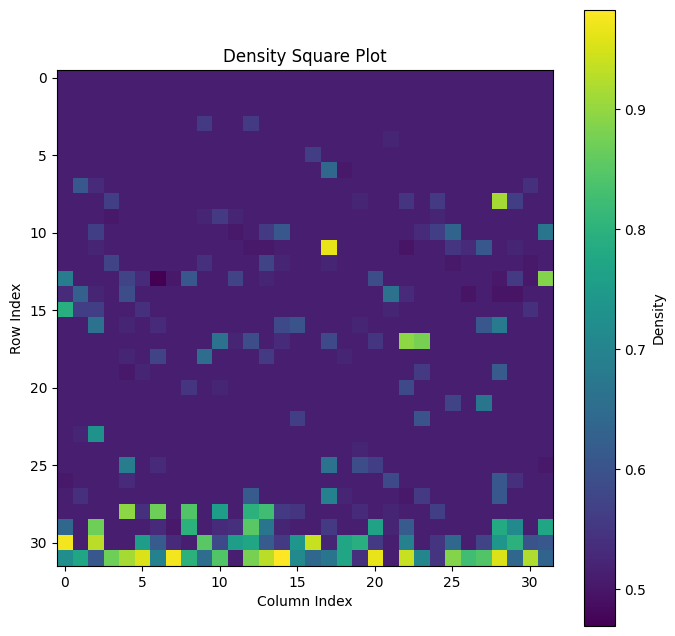

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your 32x32 dataset
# Replace this with your actual data matrix
data = all_head_accs_np.reshape(32,32) # np.random.rand(32, 32)  # Example data

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Density')

plt.title('Density Square Plot')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

plt.show()

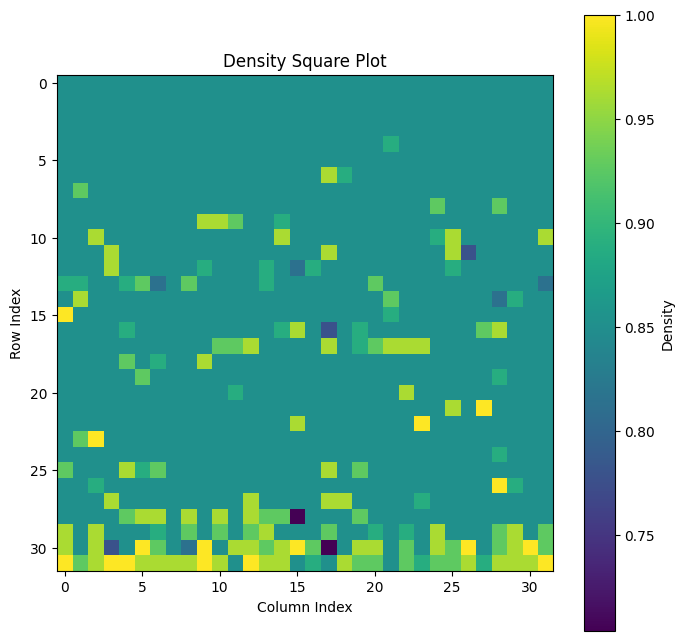

In [211]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your 32x32 dataset
# Replace this with your actual data matrix
data = all_head_accs_np.reshape(32,32) # np.random.rand(32, 32)  # Example data

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Density')

plt.title('Density Square Plot')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

plt.show()

In [204]:
16/27

0.5925925925925926

In [192]:
#separated_labels[val_set_idxs[4]]

In [193]:
#separated_labels[train_set_idxs[5]]

In [207]:
val_set.req_id.unique()

array(['RQ-8-3', 'RQ-2-2', 'RQ-2-5', 'RQ-8-6', 'RQ-8-7', 'RQ-2-7'],
      dtype=object)

In [152]:
train_labels = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
#train_labels.sum()/ train_labels.shape[0]
train_labels

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0])

In [9]:
from sklearn.metrics import recall_score, precision_score

def get_precision_recall(df):

    df_openchat = df
    predict_openchat = generate_majority_predictions(df_openchat)

    df_gpt4 = pd.read_json("results_gpt4_cot_moon_complete.json")
    predict_gpt4 = generate_majority_predictions(df_gpt4)

    # Merge the DataFrames on the 'req_id' column
    merged_df = pd.merge(predict_gpt4, predict_openchat, on='req_id', suffixes=('_gpt4', '_openchat'))

    # Compare the values in the 'majority_predict' column
    merged_df['is_same'] = merged_df['majority_predict_gpt4'] == merged_df['majority_predict_openchat']
    merged_df.head(5)

    df = merged_df
    df = df[df['uncertainty_openchat'] > 0.5]
    df['majority_predict_openchat'] = df['majority_predict_openchat'].apply(lambda x: 1 if x == "yes" else 0)
    df['majority_predict_gpt4'] = df['majority_predict_gpt4'].apply(lambda x: 1 if x == "yes" else 0)

    precision = precision_score(df['majority_predict_gpt4'], df['majority_predict_openchat'])

    recall = recall_score(df['majority_predict_gpt4'], df['majority_predict_openchat'])

    return precision, recall

In [57]:
#df 

In [68]:
from sklearn.metrics import recall_score, precision_score

recall = recall_score(df['majority_predict_gpt4'], df['majority_predict_openchat'])
recall

1.0

In [44]:
#df['majority_predict_gpt4']#.values()

In [72]:
df.head(1)
len(df[(df['majority_predict_gpt4'] == 1) & (df['is_same'] == True)]) / len(df[df['majority_predict_openchat'] == 1])

0.36363636363636365

In [ ]:
#df.head(1)
len(df[(df['majority_predict_gpt4'] == 1) & (df['is_same'] == True)]) / len(df[df['majority_predict_openchat'] == 1])

In [69]:
precision = precision_score(df['majority_predict_gpt4'], df['majority_predict_openchat'])
precision

0.36363636363636365

In [ ]:
precision = len(df[(df.final_answer == True) & (df.correct == True)]) / len(df[df.final_answer == True])


In [60]:
precision = len(df[(df.final_answer == True) & (df.correct == True)]) / len(df[df.final_answer == True])
# precision 

In [19]:
len(df[(df.final_answer == True) & (df.correct == True)])

26

In [17]:
recall = len(df[(df.final_answer == True) & (df.correct == True)]) / (len(df[(df.final_answer == True) & (df.correct == True)]) + len(df[(df.final_answer == False) & (df.correct == False)]))
recall #['score'].mean()

0.7222222222222222

In [18]:
df_openchat = pd.read_json("dataframe_open_chat_cot_moon_18012024_attentions.json")
predict_openchat = generate_majority_predictions(df_openchat)

df_gpt4 = pd.read_json("results_gpt4_cot_moon_complete.json")
predict_gpt4 = generate_majority_predictions(df_gpt4)

# Merge the DataFrames on the 'req_id' column
merged_df = pd.merge(predict_gpt4, predict_openchat, on='req_id', suffixes=('_gpt4', '_openchat'))

# Compare the values in the 'majority_predict' column
merged_df['is_same'] = merged_df['majority_predict_gpt4'] == merged_df['majority_predict_openchat']
merged_df.head(5)

df1 = df_openchat
df2 = merged_df
key = "req_id"
# Merging df1 with a column (value2) from df2 using 'key' as the common column
df = df1.merge(df2[[key, 'majority_predict_openchat',"uncertainty_openchat",'is_same']], on=key, how='left')
df = df.rename(columns={'is_same':'correct'})
df = df[df['uncertainty_openchat'] > 0.5]
precision = len(df[(df.final_answer == True) & (df.correct == True)]) / (len(df[(df.final_answer == True) & (df.correct == True)]) + len(df[(df.final_answer == True) & (df.correct == False)]))
precision #['score'].mean()

0.46153846153846156

In [8]:

# for out in df[(df['score'] == "undefined")].output.values:
#     print("___________________")
#     print(out )

In [7]:
# for out in df[(df['predict']== "undefined")].output.values: 

#     print("___________________")
#     print(out )

In [176]:
#df[(df.final_answer == True) & (df.correct == True)].head(3)

In [9]:
#df[(df.final_answer == True) & (df.correct == False)].head(3)

In [37]:
df.index

RangeIndex(start=0, stop=81, step=1)

In [20]:
#df[df['req_id'] == req_id]#.index

In [70]:
len(activations.values[0].keys())

1024

In [79]:
#list(activations.values[0].values())#[0:5]

In [116]:
activations = np.array([list(sample.values()) for sample in temp_activations.values])#.shape
batch_length = len(temp_activations)
dim = 128
activations = np.reshape(activations, (batch_length, 32, 32, dim))

In [118]:
activations.shape

(5, 32, 32, 128)

In [113]:
len(temp_activations.values)

5

In [108]:
#temp_activations.values[0]['layer_0_head_0'][0:5]

In [106]:
activations[21][10][0:5]#.shape

array([ 0.03457642, -0.01705933,  0.01655579, -0.01773071, -0.06921387])

In [178]:
# temp_activations.values[0]['layer_21_head_10'][0:5]

In [93]:
# activations

In [120]:
#activations = np.reshape(activations, (32, 32))


#activations.shape

In [127]:
#temp_labels

In [5]:
import numpy as np

#req_ids = []
index_dic = {}
separated_activations = []
separated_labels = []

for req_id in df['req_id'].unique():

    req_df = df[df['req_id'] == req_id].index

    #req_ids.append(req_df)
    index_dic[req_id] = list(req_df)
    
    temp_activations = df[df['req_id'] == req_id].attentions
    activations = np.array([list(sample.values()) for sample in temp_activations.values])#.shape
    batch_length = len(temp_activations)
    dim = 128
    activations = np.reshape(activations, (batch_length, 32, 32, dim))

    temp_labels =[1 if label==True else 0 for label in df[df['req_id'] == req_id]['correct'].values]
    separated_labels.append(temp_labels)
    separated_activations.append(activations)
    
#index_dic
#separated_activations   
#len(labels)

In [7]:
from dataclasses import dataclass

@dataclass
class Args:
    #model_name: str
    #dataset_name: str
    #activations_dataset: str
    val_ratio: float

args = Args(val_ratio=0.5)

import numpy as np

train_idxs = np.arange(len(list(index_dic.keys())))
# Create a random generator with a specific seed
seed = 42  # You can choose your own seed value
rng = np.random.default_rng(seed)
size = int(len(train_idxs)*(1-args.val_ratio))
print(size)
train_set_idxs = rng.choice(train_idxs, size=size, replace=False)
val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])

# pick a val set using numpy
#train_set_idxs = np.random.choice(train_idxs, size=int(len(train_idxs)*(1-args.val_ratio)), replace=False)
#val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])
len(val_set_idxs)

In [9]:
val_set_idxs

array([ 1,  2,  3,  7,  8, 10, 12])

In [13]:
indexes = np.concatenate([list(index_dic.values())[i] for i in val_set_idxs], axis = 0)
indexes

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 32, 33, 34, 35,
       36, 37, 38, 44, 45, 46, 50, 51, 52])

In [15]:
df.loc[indexes]

,prompt,output,final_answer,predict,score,sequence_uncertainty,hidden_states.-1_last_token,hidden_states.-8_last_token,hidden_states.-16_last_token,hidden_states.-24_last_token,req_id,requirement,complete_inputs,attentions,majority_predict_openchat,uncertainty_openchat,correct
4,"GPT4 Correct User:System: |Structure, Shieldin...","\n\n1. The ""Logical System"" is a component of ...",True,yes,0.91,0.13,"[3.9140625, 3.478515625, 0.5551757812, 1.85351...","[0.0048217773, 0.0640258789, 0.0997924805, 0.1...","[-0.0059204102, 0.0032958984, 0.03271484380000...","[-0.0165252686, 0.016494751000000002, -0.01963...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0016679764, -0.00129413...",yes,0.800000,False
5,"GPT4 Correct User:System: |Structure, Shieldin...","\n\n1. The System describes the structure, shi...",True,yes,0.95,0.14,"[3.609375, 3.626953125, 2.060546875, 1.7695312...","[-0.0025634766, 0.0680541992, 0.1242675781, 0....","[-0.0099487305, 0.0057067871, 0.0256347656, 0....","[-0.0198669434, 0.0048789978, -0.0099945068, -...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0022544861, -0.00114536...",yes,0.800000,False
6,"GPT4 Correct User:System: |Structure, Shieldin...",\n\n1. The settlement consists of multiple sub...,True,yes,0.94,0.13,"[4.25, 4.08203125, 1.16796875, 1.79296875, 4.2...","[0.0152893066, 0.0825805664, 0.1143798828, 0.1...","[0.0092163086, 0.0173950195, 0.029327392600000...","[-0.0111923218, 0.013832092300000001, -0.01602...",RQ-8-3,The settlement shall remove sufficient particl...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0017986298, -0.00088310...",yes,0.800000,False
7,"GPT4 Correct User:System: |Structure, Shieldin...",\n\n1. The settlement's structure includes Shi...,True,yes,0.88,0.18,"[5.37890625, 6.77734375, 4.546875, -0.41503906...","[0.0649414062, 0.1099243164, 0.2034912109, 0.0...","[-0.019287109400000002, 0.0046615601, 0.068176...","[-0.0228881836, -0.0026245117, -0.0243530273, ...",RQ-8-3,The settlement shall have at least 70% efficie...,"GPT4 Correct User:System: |Structure, Shieldin...","{'layer_0_head_0': [-0.0016727448000000002, -0...",yes,0.800000,False
8,GPT4 Correct User:System: |Waste Management| |...,\n\n1. The Logical System contains a Water Loo...,False,no,0.89,0.17,"[-1.216796875, 8.046875, 3.53515625, -0.013572...","[0.011207580600000001, 0.1165161133, -0.004882...","[-0.0916137695, 0.027038574200000002, -0.00579...","[-0.0113677979, 0.0179138184, -0.0206451416, 0...",RQ-8-4,The settlement shall have at least 70% efficie...,GPT4 Correct User:System: |Waste Management| |...,"{'layer_0_head_0': [-0.0017786026, -0.00098800...",no,1.000000,True
9,GPT4 Correct User:System: |Waste Management| |...,\n\n1. The system described is a Logical Syste...,False,no,0.85,0.17,"[3.177734375, 8.4453125, 4.5, 0.5991210938, 1....","[0.1166992188, 0.1052246094, 0.1435546875, 0.1...","[-0.0098266602, 0.0516357422, 0.11950683590000...","[-0.0055923462, 0.0001144409, -0.0117874146, -...",RQ-8-4,The settlement shall have at least 70% efficie...,GPT4 Correct User:System: |Waste Management| |...,"{'layer_0_head_0': [-0.0012130737, -0.00112056...",no,1.000000,True
10,GPT4 Correct User:System: |Waste Management| |...,\n\n1. The System contains a Waste Management ...,False,no,0.94,0.13,"[2.453125, 8.765625, 2.8046875, 1.5205078125, ...","[0.0639648438, 0.0885009766, 0.12109375, 0.185...","[-0.0217895508, 0.0566711426, 0.1318359375, 0....","[-0.0060348511, -0.0004196167, -0.014465332000...",RQ-8-4,The settlement shall have at least 70% efficie...,GPT4 Correct User:System: |Waste Management| |...,"{'layer_0_head_0': [-0.0014562607, -0.00174903...",no,1.000000,True
11,GPT4 Correct User:System: |Waste Management| |...,\n\n1. The System consists of several componen...,False,no,1.0,0.15,"[-1.7880859375, 6.54296875, 4.0703

In [184]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm
def train_probes(seed, train_set_idxs, val_set_idxs, separated_head_wise_activations, separated_labels, num_layers, num_heads):
    
    all_head_accs = []
    probes = []

    all_X_train = np.concatenate([separated_head_wise_activations[i] for i in train_set_idxs], axis = 0)
    print(all_X_train.shape)
    all_X_val = np.concatenate([separated_head_wise_activations[i] for i in val_set_idxs], axis = 0)
    y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
    print(y_train.shape)
    y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

    for layer in tqdm(range(num_layers)): 
        for head in range(num_heads): 
            X_train = all_X_train[:,layer,head,:]
            X_val = all_X_val[:,layer,head,:]
    
            clf = LogisticRegression(random_state=seed, max_iter=1000).fit(X_train, y_train)
            y_pred = clf.predict(X_train)
            y_val_pred = clf.predict(X_val)
            all_head_accs.append(accuracy_score(y_val, y_val_pred))
            probes.append(clf)

    all_head_accs_np = np.array(all_head_accs)

    return probes, all_head_accs_np

In [185]:
num_layers =32
num_heads = 32

val_idxs = val_set_idxs
probes, all_head_accs_np = train_probes(seed, train_set_idxs, val_idxs, separated_activations, separated_labels, num_layers=num_layers, num_heads=num_heads)

(27, 32, 32, 128)
(27,)


  0%|          | 0/32 [00:00<?, ?it/s]

In [160]:
#all_head_accs_np.reshape(32,32)#.shape

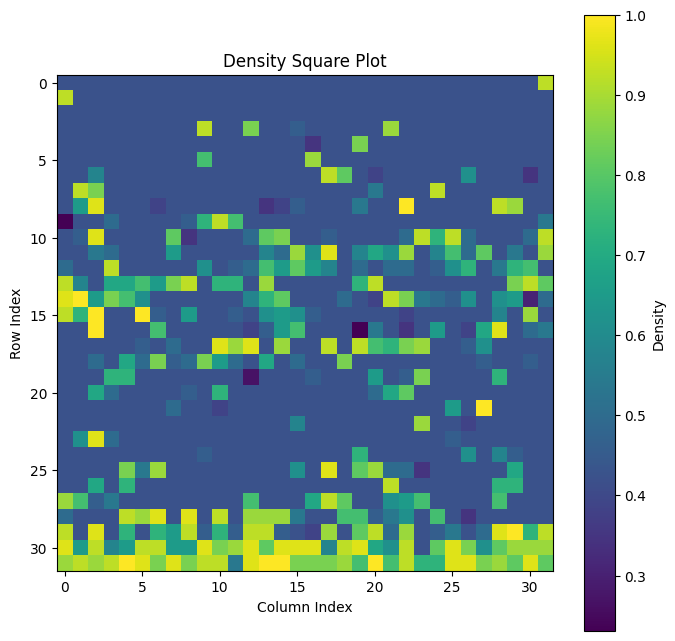

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your 32x32 dataset
# Replace this with your actual data matrix
data = all_head_accs_np.reshape(32,32) # np.random.rand(32, 32)  # Example data

plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Density')

plt.title('Density Square Plot')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

plt.show()

In [148]:
len(train_idxs)

17

In [145]:
print(args.val_ratio)
int(len(train_idxs)*(1-args.val_ratio))

0.5


8

In [150]:
#indexes = index_dic.values()
#list(indexes)

In [55]:
#train_set_idxs

In [56]:
#val_set_idxs

In [54]:
#train_idxs

In [45]:
import numpy as np
train_idxs = np.arange(len(df))

train_idxs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])